In [5]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
import gc

## Lecture des données

In [63]:
data=pd.read_csv('./villes.csv',sep=';',header=0)
data.head(3)

,ville,janv,fev,mars,avril,mai,juin,juil,aout,sept,oct,nov,dec
0,ajac,7.7,8.7,10.5,12.6,15.9,19.8,22.0,22.2,20.3,16.3,11.8,8.7
1,ange,4.2,4.9,7.9,10.4,13.6,17.0,18.7,18.4,16.1,11.7,7.6,4.9
2,ango,4.6,5.4,8.9,11.3,14.5,17.2,19.5,19.4,16.9,12.5,8.1,5.3


In [64]:
X=data.iloc[:,1:13].values
labels=data.iloc[:,0].values

## Importation des bibliothèques

In [65]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Normalisation

In [66]:
SS=StandardScaler()
SS.fit(X)
Xnorm=SS.transform(X)

#Xnorm=SS.fit_transform(X) ###A éviter quand des futures de données peuvent arriver

In [67]:
Xnorm[0,:]

array([1.63835106, 1.78748032, 1.35686597, 1.16748094, 1.09413658,
       1.2081338 , 1.11734499, 1.39767179, 1.73963204, 1.93208186,
       1.82836605, 1.68024825])

## PCA

In [110]:
pca=PCA(n_components=0.9)
pca.fit(Xnorm)

PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

#### Bon à savoir 

### Les valeurs propres sélectionnées

In [111]:
pca.explained_variance_

array([10.80999558,  1.45184229])

### Information (variance) expriquée par valauer propre

In [112]:
pca.explained_variance_ratio_

array([0.87268193, 0.11720602])

### Interprétation des axes

In [102]:
pca.components_

array([[ 0.27151028,  0.28846164,  0.3010811 ,  0.30354174,  0.28353089,
         0.27841907,  0.27290295,  0.28757774,  0.30472022,  0.3038548 ,
         0.29242808,  0.2729549 ],
       [ 0.39933494,  0.29907184,  0.12943051, -0.11530598, -0.32314291,
        -0.35846763, -0.38879639, -0.3010133 , -0.11231622,  0.12249226,
         0.26269461,  0.38693688]])

#### Bon à savoir 

#### Axe 1

In [120]:
pca.components_[0,:]

array([0.27151028, 0.28846164, 0.3010811 , 0.30354174, 0.28353089,
       0.27841907, 0.27290295, 0.28757774, 0.30472022, 0.3038548 ,
       0.29242808, 0.2729549 ])

#### Axe 2

In [106]:
pca.components_[1,:]

array([ 0.39933494,  0.29907184,  0.12943051, -0.11530598, -0.32314291,
       -0.35846763, -0.38879639, -0.3010133 , -0.11231622,  0.12249226,
        0.26269461,  0.38693688])

### Cercle de correlartion

Text(0.5,1,'Circle of Correlations')

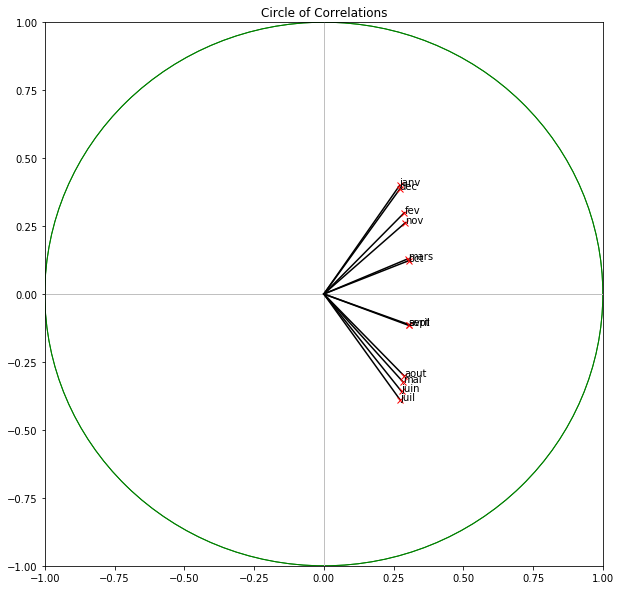

In [119]:
coef = np.transpose(pca.components_)
cols = ['y'+str(x+1) for x in range(2)]

pc_infos=pd.DataFframe(coef,columns=cols, index=data.iloc[:,1:].colimns)

plt.Circle((0,0),radius=10, color='g', fill=False)
circle1=plt.Circle((0,0),radius=1, color='g', fill=False)
# Ajouter les axes et donner la limite pour chaque axe
fig, axes= plt.subplots(figsize=(10,10))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
fig.gca().add_artist(circle1)
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)
axes.add_artist(circle1)
# Affichage de chaque variable explicative dans la cercle
for idx in range(len(pc_infos["y1"])):
    x = pc_infos["y1"][idx]
    y = pc_infos["y2"][idx]
    plt.plot([0.0,x],[0.0,y],'k-')
    plt.plot(x, y, 'rx')
    plt.annotate(pc_infos.index[idx], xy=(x,y))
plt.xlim((-1,1))
plt.ylim((-1,1))
plt.title("Circle of Correlations")


### Projection des données sur les nouveaux axes

In [ ]:
X_pca=pca.transform(Xnorm)

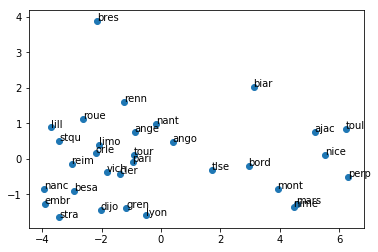

In [74]:
plt.scatter(X_pca[:, 0], X_pca[:, 1])
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()
